# Unsupervised Machine Learning: World University Rankings

## 1. Importing libraries and data load

In [58]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [59]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

In [60]:
# Load data/define path 
path = r'C:\Users\ale_o\OneDrive\Escritorio\Data Analytics\7. Advanced Analytics and Dashboard Design'

In [61]:
# Load data 
df = pd.read_csv(os.path.join(path, 'Data', 'Original Data', 'cwurData.csv'))

In [62]:
df.shape

(2200, 14)

In [63]:
df.head(10)

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
0,1,Harvard University,USA,1,1,1,1,1,1,1,NaN,7,100.00,2013
1,1,Harvard University,USA,1,1,1,1,1,1,1,1.0,2,100.00,2014
2,1,Harvard University,USA,1,1,1,1,1,1,1,1.0,3,100.00,2015
3,2,Stanford University,USA,2,11,2,4,6,2,2,NaN,11,93.94,2013
4,2,Stanford University,USA,2,11,2,4,5,3,3,4.0,6,99.09,2014
5,2,Stanford University,USA,2,9,2,4,5,3,3,4.0,10,98.66,2015
6,61,École Polytechnique,France,3,47,3,101,101,101,101,NaN,101,48.33,2012
7,14,University of Tokyo,Japan,1,17,3,32,14,23,29,NaN,5,76.23,2013
8,13,University of Tokyo,Japan,1,17,3,33,12,16,28,26.0,14,80.64,2014
9,13,University of Tokyo,Japan,1,16,3,38,14,19,31,29.0,7,78.23,2015


In [64]:
df.isnull().sum()

world_rank                0
institution               0
country                   0
national_rank             0
quality_of_education      0
alumni_employment         0
quality_of_faculty        0
publications              0
influence                 0
citations                 0
broad_impact            200
patents                   0
score                     0
year                      0
dtype: int64

In [65]:
# Define numerical variables for analysis
analysis = df[['world_rank', 'national_rank', 'quality_of_education','quality_of_faculty',
    'patents', 'score', 'alumni_employment']]

In [66]:
analysis.head(10)

,world_rank,national_rank,quality_of_education,quality_of_faculty,patents,score,alumni_employment
0,1,1,1,1,7,100.00,1
1,1,1,1,1,2,100.00,1
2,1,1,1,1,3,100.00,1
3,2,2,11,4,11,93.94,2
4,2,2,11,4,6,99.09,2
5,2,2,9,4,10,98.66,2
6,61,3,47,101,101,48.33,3
7,14,1,17,32,5,76.23,3
8,13,1,17,33,14,80.64,3
9,13,1,16,38,7,78.23,3


In [67]:
df.columns

Index(['world_rank', 'institution', 'country', 'national_rank',
       'quality_of_education', 'alumni_employment', 'quality_of_faculty',
       'publications', 'influence', 'citations', 'broad_impact', 'patents',
       'score', 'year'],
      dtype='object')

## 2. Elbow technique

In [68]:
# Define number of clusters
num_cl = range(1,5)
kmeans = [KMeans(n_clusters = i) for i in num_cl]

In [69]:
score = [kmeans[i].fit(analysis).score(analysis) for i in range(len(kmeans))]
score

[-493190619.937854,
 -214602289.51086563,
 -155317936.65602314,
 -125519586.08048192]

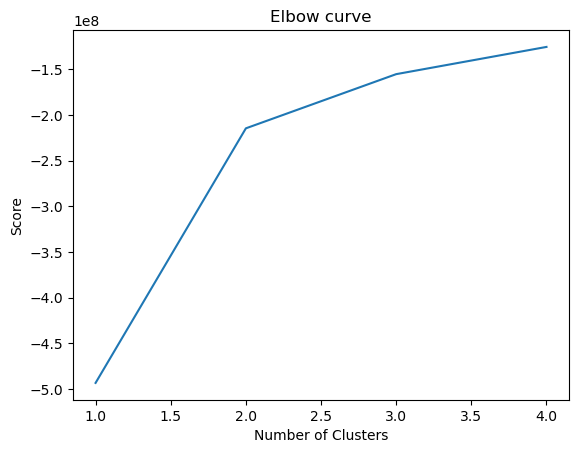

In [70]:
#Plot the elbow curce 

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow curve')
pl.show()

#### Comments: 
The elbow technique is where the curve starts to have a flat behaviour, in the graph we can see how the line goes from 2 to 3 and then to 4. 
Therefore, 3 clusters will be considered for this analysis. 

## 3. K-means algorithm

In [71]:
# Create the k-means object 
kmeans = KMeans(n_clusters =3)

In [72]:
# Fit the k-means object to the data 
kmeans.fit(analysis)

KMeans(n_clusters=3)

In [73]:
# Add a new column in dataframe to assing cluster number
analysis['clusters'] = kmeans.fit_predict(analysis)

C:\Users\ale_o\AppData\Local\Temp\ipykernel_20296\2381367630.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  analysis['clusters'] = kmeans.fit_predict(analysis)


In [74]:
analysis.head(15)

,world_rank,national_rank,quality_of_education,quality_of_faculty,patents,score,alumni_employment,clusters
0,1,1,1,1,7,100.00,1,1
1,1,1,1,1,2,100.00,1,1
2,1,1,1,1,3,100.00,1,1
3,2,2,11,4,11,93.94,2,1
4,2,2,11,4,6,99.09,2,1
5,2,2,9,4,10,98.66,2,1
6,61,3,47,101,101,48.33,3,1
7,14,1,17,32,5,76.23,3,1
8,13,1,17,33,14,80.64,3,1
9,13,1,16,38,7,78.23,3,1


In [75]:
analysis['clusters'].value_counts()

0    912
2    748
1    540
Name: clusters, dtype: int64

## 4. Create scatterplots

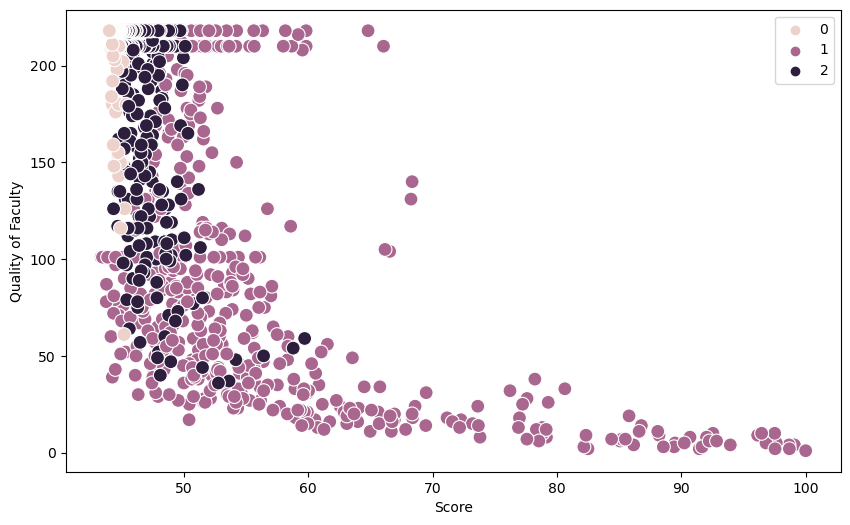

In [76]:
# Plot the clusters for quality of faculty
plt.figure(figsize=(10,6))
ax = sns.scatterplot(x=analysis['score'], y= analysis['quality_of_faculty'], hue = kmeans.labels_, s=100)

ax.grid(False)
plt.xlabel('Score')
plt.ylabel('Quality of Faculty')
plt.show()

### Comments: 
The scatterplot doesn't present any groping of the data. Although, it can be seen how the variable do have a directly impact between them, since as the score increases, the ranks also increases. 


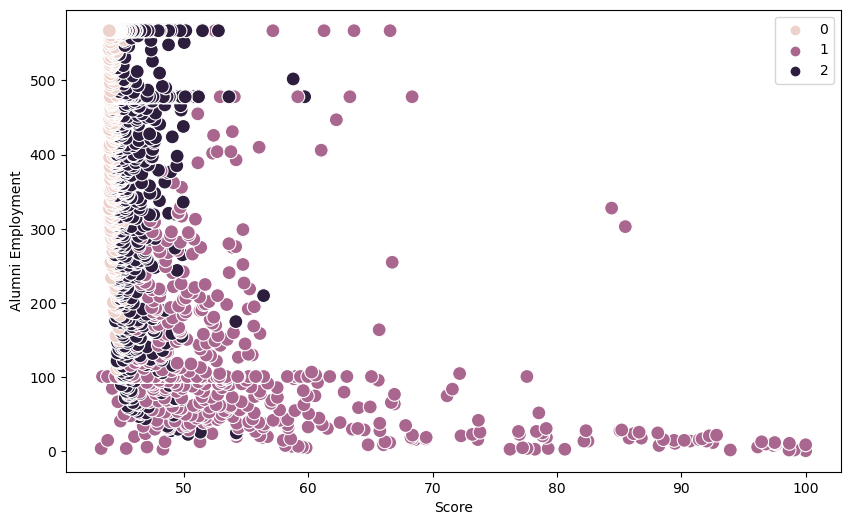

In [77]:
# Plot the clusters for world_rank  
plt.figure(figsize=(10,6))
ax = sns.scatterplot(x=analysis['score'], y= analysis['alumni_employment'], hue = kmeans.labels_, s=100)

ax.grid(False)
plt.xlabel('Score')
plt.ylabel('Alumni Employment')
plt.show()

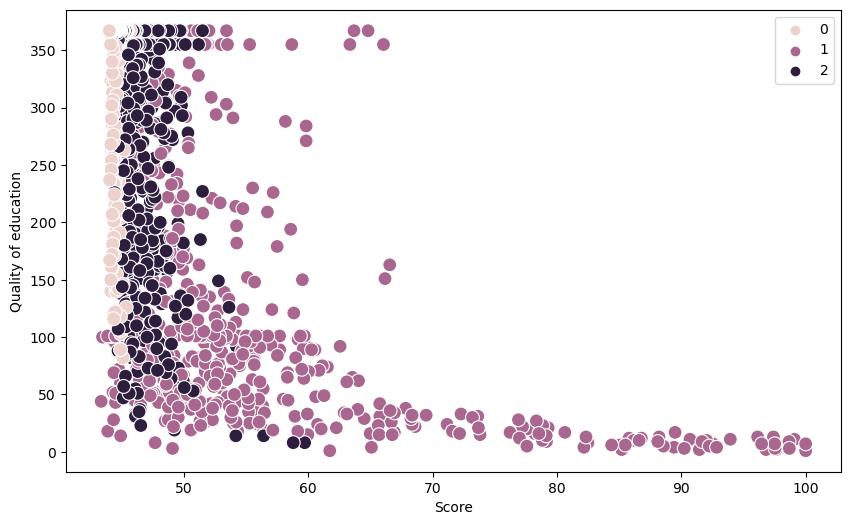

In [78]:
# Plot the clusters for world_rank  
plt.figure(figsize=(10,6))
ax = sns.scatterplot(x=analysis['score'], y= analysis['quality_of_education'], hue = kmeans.labels_, s=100)

ax.grid(False)
plt.xlabel('Score')
plt.ylabel('Quality of education')
plt.show()

In [79]:
analysis.loc[analysis['clusters'] == 2, 'cluster'] = 'dark purple'
analysis.loc[analysis['clusters'] == 1, 'cluster'] = 'purple'
analysis.loc[analysis['clusters'] == 0, 'cluster'] = 'pink'

C:\Users\ale_o\AppData\Local\Temp\ipykernel_20296\2960289416.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  analysis.loc[analysis['clusters'] == 2, 'cluster'] = 'dark purple'


In [56]:
analysis.groupby('cluster').agg({'quality_of_education':['mean', 'median'], 
                         'score':['mean', 'median'], 
                         'quality_of_faculty':['mean', 'median']})

quality_of_education             score        quality_of_faculty  \
                            mean median       mean median               mean   
cluster                                                                        
dark purple           121.130112   95.0  55.746450  51.28          95.981413   
pink                  300.119785  355.0  46.175801  45.63         196.734859   
purple                345.009793  355.0  44.457301  44.42         212.994559   

                    
            median  
cluster             
dark purple   82.0  
pink         210.0  
purple       218.0

### Comments: 
For both variables, quality of education and world rank, we can see there are not clusters defined that follow the behaviour of a group. 

As following steps it could be useful to see if it is necessary to increase the data analyzed.